# 분류분석

***
## 1. 의사결정나무
### 장점
- 누구나 쉽게 설명 가능
- 대용량 데이터에도 빠르게 적용 가능
- 다중공선성이 존재해도 크게 영향 받지 않는다.
- 데이터의 민감성이 낮다.

### 단점
- 과대적합 가능성
- 분류 경계선 근처의 자료값은 오차가 크다.
- 설명변수의 중요도 판단 어렵다.

#### 분리 규칙을 찾아서 적절한 정지규칙을 만족하면 가지치기를 중단한다.
#### 이익도표, 위험도표 혹은 시험자료를 이용해 평가한다.
#### 기본적으로 지니계수를 이용하여 데이터 분할


### 불순도 측도
- 지니지수 : 1로 갈수록 균일도가 높으므로 지니계수가 높은 속성을 기준으로 분할
- 엔트로피지수(정보이득) : 데이터의 혼잡도를 의미하며 서로 다른 값이 섞여 있으면 엔트로피가 높고 같은 값이 섞여 있으면 엔트로피가 낮다
- 카이제곱 통계량 : ((실제도수 - 기대도수)의 제곱 / 기대도수)의 합

In [160]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [48]:
b_c = load_breast_cancer()

In [49]:
data = pd.DataFrame(b_c.data, columns = b_c.feature_names)

In [50]:
data['target'] = b_c.target

In [51]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('target', axis = 1), data.target, test_size = .1, random_state = 326)

In [52]:
dt = DecisionTreeClassifier(random_state = 326)

In [53]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=326)

In [54]:
pred = dt.predict(X_test)

In [55]:
acc = accuracy_score(y_test, pred)
print(acc)

0.8947368421052632


### 의사결정나무 알고리즘

1. CART 알고리즘 : 가장 일반적인 의사결정나무
2. C4.5 & C5.0 알고리즘 : 다지분리가 가능하며 범주의 수만큼 분리가 일어남 / 불순도 측도로는 엔트로피 지수 사용
3. CHAID 알고리즘 : 가지치기 하지 않고 카이제곱 통계량 사용
***

## 2. 나이브 베이즈 분류

#### 변수들에 대한 조건부 독립을 가정하는 알고리즘으로 사전 정보와 데이터로부터 추출된 정보를 결합하고 베이즈 정리를 이용하여 분류한다.
#### 텍스트 분류에서 많이 사용된다.
#### 하나의 속상 값을 기준으로 다른 속성이 독립적이라 전제(클래스 조건 독립성)했을 때 해당 속성 값이 클래스 분류에 미치는 영향을 측정

In [56]:
from sklearn.naive_bayes import GaussianNB

In [57]:
nb = GaussianNB()

In [58]:
nb.fit(X_train, y_train)

GaussianNB()

In [59]:
pred = nb.predict(X_test)

In [60]:
acc = accuracy_score(y_test, pred)
print(acc)

0.8771929824561403


***
## 3. KNN

#### 새로운 데이터의 클래스를 해당 데이터와 가장 까까운 k개 데이터들의 클래스로 결정한다.
#### 다양한 거리 함수를 적용하는데 기본적으로 유클리디안 거리를 사용한다.
#### 일반적으로 훈련 데이터 개수의 제곱근을 k로 설정한다.
- k가 너무 클경우 근접성이 떨어져 클러스터링이 잘 이루어지지 않고 너무 작으면 이상치와 묶일 가능성이 있다.

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
knn = KNeighborsClassifier(n_neighbors = int(np.sqrt(data.shape[0])))

In [63]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=23)

In [64]:
pred = knn.predict(X_test)

In [65]:
acc = accuracy_score(y_test, pred)
print(acc)

0.8596491228070176


***

## 4. SVM

#### 비확률적 이진 선형 분류 모델을 생성한다.
#### 데이터가 사상된 공간에서 경계로 표현하며 여러 경계 중 가장 큰 폭을 가진 경계를 찾는다.
#### 각 그룹을 구분하는 분류자를 결정 초평면, 각 그룹에 속한 데이터 중에서도 초평면에 가장 가까이 있는 최전방 데이터를 서포트 벡터, 서포트 벡터와 초평면 사이의 수직거리를 마진이라고 한다.
#### 마진을 최대화 하는 초평면을 찾아 분류와 회귀를 수행한다.
#### 비선형 분류에도 사용되는데 이 때 커널트릭을 사용한다.

In [148]:
from sklearn.svm import LinearSVC, SVC

In [143]:
svm = LinearSVC()

In [144]:
svm.fit(X_train, y_train)

LinearSVC()

In [145]:
pred = svm.predict(X_test)

In [146]:
acc = accuracy_score(y_test, pred)

In [147]:
acc

0.8421052631578947

#### svm은 클래스에 대한 확률을 제공하지 않는다.

In [154]:
svc = SVC(kernel = 'poly') # 커널 트릭 사용 / poly, rbf,....

In [150]:
svc.fit(X_train, y_train)

SVC(kernel='poly')

In [151]:
pred = svc.predict(X_test)

In [152]:
acc = accuracy_score(y_test, pred)

In [153]:
acc

0.8771929824561403

***

## 5. 앙상블 분석

### 종류
1. 배깅 : 부트스트랩(주어진 자료에서 동일한 크기의 표본을 랜덤 복원추출로 뽑은 자료) 자료에 예측모형을 만든 후 결합하여 최종 예측모형을 만드는 방식 / 가지치기 하지 않음 / 훈련자료를 모집단으로 생각하고 평균예측모형을 구하여 분산을 줄이고 예측력을 향상시킴
- 대표적 방식이 랜덤포레스트

2. 부스팅 : 예측력 약한 모형을 결합하여 강한 예측모형을 만든다. 훈련 오차를 빠르고 쉽게 줄인다. 한 모델안에서 여러개의 분류기 생성, 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선

3. 보팅 : 하드 보팅 = 투표 / 소프트 보팅 = 확률, 서로 다른 분류기의 결과값 취합

#### 보팅과 스태킹은 서로 다른 알고리즘 기반 / 배깅과 부스팅은 결정 트리 알고리즘을 기반으로 한다.

In [71]:
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, RandomForestClassifier, \
GradientBoostingClassifier, BaggingClassifier, VotingClassifier

In [67]:
abc = AdaBoostClassifier(random_state = 326)
rf = RandomForestClassifier(random_state = 326)
etc = ExtraTreesClassifier(random_state = 326)
bc = BaggingClassifier(random_state = 326)
gb = GradientBoostingClassifier(random_state = 326)

In [68]:
abc.fit(X_train, y_train)
rf.fit(X_train, y_train)
etc.fit(X_train, y_train)
bc.fit(X_train, y_train)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=326)

In [77]:
for model in [abc, rf, etc, bc, gb] :
    pred = model.predict(X_test)
    acc = round(accuracy_score(y_test, pred), 4)
    print(f'{model.__class__.__name__}의 정확도는 {acc}')

AdaBoostClassifier의 정확도는 0.9123
RandomForestClassifier의 정확도는 0.9474
ExtraTreesClassifier의 정확도는 0.9474
BaggingClassifier의 정확도는 0.9298
GradientBoostingClassifier의 정확도는 0.9298


### Voting

In [72]:
vot = VotingClassifier(estimators = [('rf', rf), ('etc', etc), ('gb', gb)], voting = 'soft')

In [73]:
vot.fit(X_train, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=326)),
                             ('etc', ExtraTreesClassifier(random_state=326)),
                             ('gb',
                              GradientBoostingClassifier(random_state=326))],
                 voting='soft')

In [74]:
pred = vot.predict(X_test)

In [75]:
acc = accuracy_score(y_test, pred)

In [76]:
print(acc)

0.9473684210526315


### XGBoost, LightGBM

In [78]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [79]:
xgb = XGBClassifier(random_state = 326)
lgbm = LGBMClassifier(random_state = 326)

In [86]:
xgb.fit(X_train, y_train)
lgbm.fit(X_train, y_train)

[22:09:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


LGBMClassifier(random_state=326)

In [81]:
pred = xgb.predict(X_test)

In [82]:
accuracy_score(y_test, pred)

0.9298245614035088

In [83]:
pred = lgbm.predict(X_test)

In [84]:
accuracy_score(y_test, pred)

0.9649122807017544

## 6. 스태킹

#### 개별적인 예측 결과를 기반으로 다시 예측 수행

In [87]:
for model in [abc, rf, etc, bc, gb] :
    globals()[f'{model.__class__.__name__}_pred'] = model.predict(X_test)
    acc = round(accuracy_score(y_test, globals()[f'{model.__class__.__name__}_pred']), 4)
    print(f'{model.__class__.__name__}의 정확도는 {acc}')

AdaBoostClassifier의 정확도는 0.9123
RandomForestClassifier의 정확도는 0.9474
ExtraTreesClassifier의 정확도는 0.9474
BaggingClassifier의 정확도는 0.9298
GradientBoostingClassifier의 정확도는 0.9298


In [89]:
abc.__class__.__name__

'AdaBoostClassifier'

In [96]:
pred = np.array([AdaBoostClassifier_pred, RandomForestClassifier_pred, ExtraTreesClassifier_pred,
                BaggingClassifier_pred, GradientBoostingClassifier_pred]).T

#### 메타 모델을 lgbm으로 설정

In [97]:
lgbm.fit(pred, y_test)

LGBMClassifier(random_state=326)

In [98]:
final = lgbm.predict(pred)

In [99]:
accuracy_score(y_test, final)

0.9298245614035088

***
## 7.평가지표

### 오차분류표

In [109]:
from sklearn.metrics import confusion_matrix, auc, roc_auc_score, roc_curve, f1_score, recall_score, precision_score

In [101]:
lgbm.fit(X_train, y_train)

LGBMClassifier(random_state=326)

In [102]:
pred = lgbm.predict(X_test)

In [108]:
cf_mx = pd.DataFrame(confusion_matrix(y_test, pred))
cf_mx.columns = ['예측negative', '예측positive']
cf_mx.index = ['실제negative', '실제positive']
cf_mx

,예측negative,예측positive
실제negative,20,1
실제positive,1,35


- TN = 예측을 neg로 예측하고 실제도 neg : 20(좌측상단)
- FP = 예측을 pos로 예측하고 실제는 neg : 1(우측상단)
- FN = 예측을 neg로 예측하고 실제는 pos : 1(좌측하단)
- TP = 예측을 pos로 예측하고 실제도 pos : 35(우측하단) 

#### 정확도(accuracy) : (TN + TP) / (TN + FP + FN + TP)
- 전체 레이블중 매칭 되는 비율

#### 정밀도(precision) : TP / (FP + TP)
- pos로 예측한 대상 중에 실제로 pos인 비율
- 실제 음성을 양성으로 예측하면 업무상 큰 영향이 발생하는 경우 ex> 스팸 분류

#### 재현율 또는 민감도 또는 TPR(recall) : TP / (FN + TP)
- 실제 pos인 대상 중에 예측도 pos인 비율
- 실제 양성 데이터를 음성으로 예측하면 업무상 큰 영향이 발생하는 경우 ex> 암 발병 예측

#### FPR = FP / (FP + TN) = 1 - TNR = 1 - 특이성

In [110]:
print(precision_score(y_test, pred))
print(recall_score(y_test, pred))
print(f1_score(y_test, pred))

0.9722222222222222
0.9722222222222222
0.9722222222222222


***
#### roc_curve = fpr이 변할 떄 tpr이 어떻게 변하는지 나타내는 지표. 
#### auc는 roc_curve의 면적으로 1에 가까울수록 좋은 수치

In [138]:
def plot_roc_curve(fpr, tpr, model, color=None) :
    model = model + ' (auc = %0.3f)' % auc(fpr, tpr)
    plt.plot(fpr, tpr, label=model, color=color)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.axis([0,1,0,1])
    plt.xlabel('FPR (1 - specificity)')
    plt.ylabel('TPR (recall)')
    plt.title('ROC curve')
    plt.legend(loc="lower right")

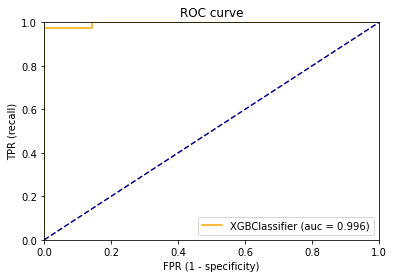

In [139]:
fpr, tpr,_ = roc_curve(y_test, xgb.predict_proba(X_test)[:,1])
plot_roc_curve(fpr, tpr, xgb.__class__.__name__, color = 'orange')

In [122]:
auc(fpr, tpr)

0.996031746031746

In [134]:
pred = xgb.predict_proba(X_test)[:, 1]

In [135]:
roc_auc_score(y_test, pred)

0.996031746031746

***

## 8. 변수중요도

In [161]:
f_imp = pd.DataFrame({'column' : data.columns[:-1], 'imp' : rf.feature_importances_})
f_imp.head()

,column,imp
0,mean radius,0.038073
1,mean texture,0.015370
2,mean perimeter,0.014111
3,mean area,0.049047
4,mean smoothness,0.004414


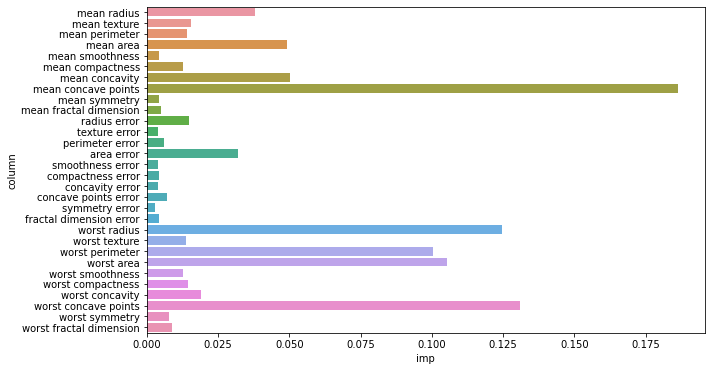

In [165]:
plt.figure(figsize = (10, 6))
sns.barplot(y = f_imp.column, x = f_imp.imp)
plt.show()

***
## 9. 모델별 파라미터

In [129]:
XGBClassifier().get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [128]:
LGBMClassifier().get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [131]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [132]:
GradientBoostingClassifier().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}